In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize']=[16,9]
from sklearn import linear_model

In [259]:
data=pd.read_csv('monthly-wage.csv',sep=';')

In [260]:
data.head(5)

,Month,Real wage
0,1993-01,100.00
1,1993-02,99.04
2,1993-03,101.77
3,1993-04,110.05
4,1993-05,115.47


In [261]:
data.Month=data.Month.apply(lambda x: datetime.strptime(x,"%Y-%m"))

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
Month        289 non-null datetime64[ns]
Real wage    289 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


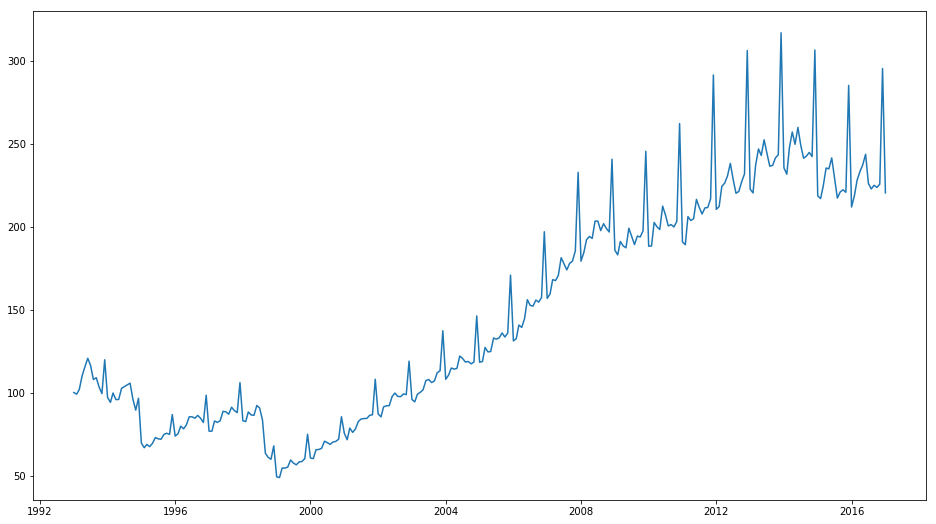

In [263]:
plt.plot(data['Month'],data['Real wage']);


In [264]:
data.set_index('Month',inplace=True)

In [265]:
data.head(5)

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


In [ ]:
# for doing further linear resgression , lags=8 
# creating new columns with shifted values of real wages

In [266]:
data['Y(t-1)']=data['Real wage'].shift(1)

In [267]:
data['Y(t-2)']=data['Real wage'].shift(2)

In [268]:
data['Y(t-3)']=data['Real wage'].shift(3)

In [269]:
data['Y(t-4)']=data['Real wage'].shift(4)

In [270]:
data['Y(t-5)']=data['Real wage'].shift(5)

In [271]:
data['Y(t-6)']=data['Real wage'].shift(6)

In [272]:
data['Y(t-7)']=data['Real wage'].shift(7)

In [273]:
data['Y(t-8)']=data['Real wage'].shift(8)

In [274]:
data.head(10)

,Real wage,Y(t-1),Y(t-2),Y(t-3),Y(t-4),Y(t-5),Y(t-6),Y(t-7),Y(t-8)
Month,,,,,,,,,
1993-01-01,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,99.04,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-01,101.77,99.04,100.00,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-01,110.05,101.77,99.04,100.00,NaN,NaN,NaN,NaN,NaN
1993-05-01,115.47,110.05,101.77,99.04,100.00,NaN,NaN,NaN,NaN
1993-06-01,120.65,115.47,110.05,101.77,99.04,100.00,NaN,NaN,NaN
1993-07-01,116.38,120.65,115.47,110.05,101.77,99.04,100.00,NaN,NaN
1993-08-01,107.85,116.38,120.65,115.47,110.05,101.77,99.04,100.00,NaN
1993-09-01,108.93,107.85,116.38,120.65,115.47,110.05,101.77,99.04,100.00


In [275]:
#deleting nan values
data_new=data.dropna()

In [276]:
y=np.array(data_new['Real wage'])
X=data_new[["Y(t-1)","Y(t-2)","Y(t-3)","Y(t-4)","Y(t-5)","Y(t-6)","Y(t-7)","Y(t-8)"]]


In [277]:
X_train=X[:int(0.6*len(X))]
y_train=y[:int(0.6*len(y))]
X_test=X[int(0.6*len(X)):]
y_test=np.array(y[int(0.6*len(y)):])


In [278]:
model= linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)



In [279]:
np.sqrt(np.mean(np.square(y_test-y_pred)))


22.805182456622

In [354]:
#SES - Multiplicative time series withtrend

In [348]:
data_new = data_new.rename(columns={"Real wage": "Real_wage"})


In [349]:
data1=data_new.Real_wage.values



In [350]:
class SES:
    def __init__(self, alpha=0.5):
        self.alpha = alpha
    
    def smooth(self, data1):
        smoothed_data = []
        for index, datum in enumerate(data1):
            if index == 0: l = datum
            l = self.alpha * datum + (1-self.alpha) * l
            smoothed_data.append(l)
        return smoothed_data


In [356]:
ses=SES(0.5)


In [357]:
smoothed_data_ses = ses.smooth(data1)

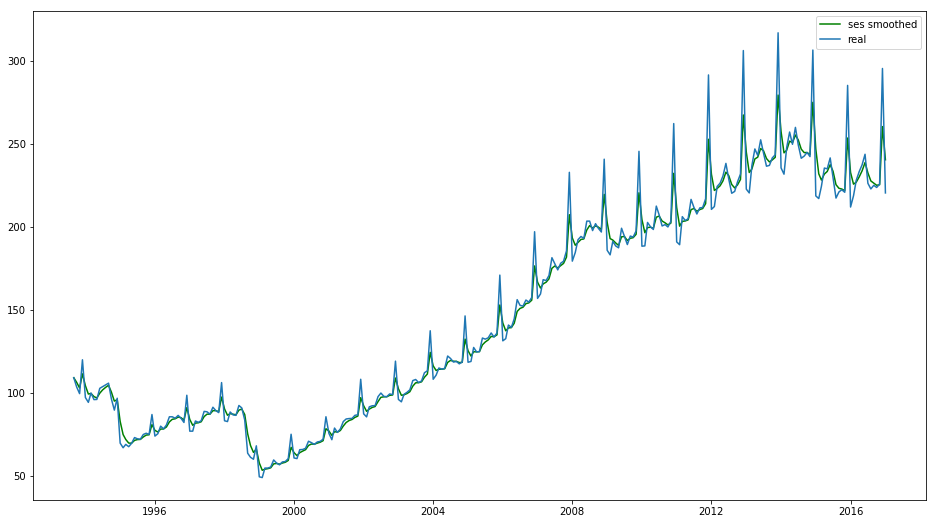

In [358]:
plt.plot(data_new.index, smoothed_data_ses, "g", label="ses smoothed")
plt.plot(data_new.index, data1, label="real")
plt.legend();

In [ ]:
y_estimated=(level+trend)*seasonality

In [ ]:
class SES:
    def __init__(self, alpha=0.5,betta=0.2,lyamda=0.3,p=12,d):
        self.alpha = alpha
        self.betta=betta
        self.lyamda=lyamda
        self.p=p
        self.d=d
    mod=self.d%self.p
    delta_l = l[t]-l[t-1] for t in range(1,len(data1))
    
    def smooth(self, data1):
        smoothed_data = []
        for index, datum in enumerate(data1):
            if index == 0: l = datum ,b= ? ,s= ?
            l = self.alpha * datum + (1-self.alpha) * l(t-1)
            delta_l = l[t]-l[t-1] for t in range(1,len(data1))
            b = self.betta*(delta_l) + (1-self.betta)*b[t-1]
            s = self.lyamda*(datum-l)+ (1-self.lyamda)*S(t-p)
            Y_est=(l+b)*s(t-self.p+mod)
            
            smoothed_data.append(Y_est)
            
        return smoothed_data
